In [80]:
# example of tf.keras using python
import tensorflow as tf
# use keras API
model = tf.keras.Sequential()
...

Ellipsis

In [116]:
print( "Keras users who use multi-backend Keras with the TensorFlow backend switch to tf.keras in TensorFlow 2.0. tf.keras is better maintained and has better integration with TensorFlow features eager execution, distribution support and other Keras Project Homepage, Accessed December 2019.")

Keras users who use multi-backend Keras with the TensorFlow backend switch to tf.keras in TensorFlow 2.0. tf.keras is better maintained and has better integration with TensorFlow features eager execution, distribution support and other Keras Project Homepage, Accessed December 2019.


In [82]:
#!pip install tensorflow

In [83]:
# check version
import tensorflow
print(tensorflow.__version__)

2.2.0


### MLP for Binary Classification

In [84]:
# mlp for binary classification
import pandas as pd
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
import pydot

In [85]:
# load the dataset
df = pd.read_csv('/home/srivastava/Documents/sklearn_work/NK_Cells.csv')
df = df.drop('Donor', axis='columns')
df.head()

,Status,NK Cells,CD16plus CD56int NK Cells,CD16plus CD56int CD69plus NK Cells,CD16plus CD56int NKp44plus NK Cells,CD16plus CD56int CXCR2hi NK Cells,CD16plus CD56int CD127plus NK Cells,CD16plus CD56int NKp46plus NK Cells,CD16plus CD56int CD107a NK Cells,CD16plus CD56int CD2plus NK Cells,...,CD16- CD56hi NKG2Cplus NK Cells,CD16- CD56hi CD94plus NK Cells,CD16- CD56hi CD25plus NK Cells,CD16- CD56hi CD226plus NK Cells,CD16- CD56hi CD57plus NK Cells,CD16- CD56hi CD57- NK Cells,CD16- CD56hi KLRG1plus NK Cells,CD16- CD56hi HLADRplus NK Cells,CD16- CD56hi ILRAplus NK Cells,NKT Population
0,ND,168029,164316,16669,164,1505,0,245,474,149757,...,752,1129,180,1031,33,1145,409,33,0,59870
1,ND,319110,309188,102196,53,28706,0,1220,2122,263608,...,3201,4882,460,3502,1539,3431,2069,778,0,32898
2,ND,76104,74531,9693,96,2696,0,0,128,50586,...,96,706,160,481,0,770,96,64,0,234859
3,ND,12498,12330,5360,24,769,0,0,0,8941,...,0,168,0,144,0,168,48,0,0,16248
4,ND,46378,45235,7148,0,50,0,25,163,25827,...,176,1030,38,892,0,1043,13,25,0,4258


In [86]:
df.isna().sum()

Status                                                      0
         NK Cells                                           0
           CD16plus CD56int NK Cells                        0
           CD16plus CD56int CD69plus NK Cells               0
           CD16plus CD56int NKp44plus NK Cells              0
           CD16plus CD56int CXCR2hi NK Cells                0
           CD16plus CD56int CD127plus NK Cells              0
           CD16plus CD56int NKp46plus NK Cells              0
          CD16plus CD56int CD107a NK Cells                  0
           CD16plus CD56int CD2plus NK Cells                0
           CD16plus CD56int CD56Dim CD62Lplus  NK Cells     0
          CD16plus CD56int CD244plus  NK Cells              0
           CD16plus CD56int NK Cells .1                     0
           CD16plus CD56int NK Cells .2                     0
           CD16plus CD56int NKp30plus  NK Cells             0
           CD16plus CD56int CD158eplus NK Cells             0
        

In [87]:
# split into input and output columns
# ensure all data are floating point values
X = df.drop('Status', axis='columns')
y=df.Status
X = X.astype('float32')

In [88]:
print(X)
print(y)

             NK Cells              CD16plus CD56int NK Cells   \
0             168029.0                               164316.0   
1             319110.0                               309188.0   
2              76104.0                                74531.0   
3              12498.0                                12330.0   
4              46378.0                                45235.0   
5             286223.0                               278575.0   
6              16239.0                                15598.0   
7              90046.0                                88460.0   
8              89288.0                                88673.0   
9             177798.0                               173666.0   
10             87473.0                                84361.0   
11            381038.0                               370340.0   
12            127886.0                               126598.0   
13             83911.0                                82733.0   
14             96050.0   

In [89]:
# encode strings to integer
y = LabelEncoder().fit_transform(y)
print(y)
#this is like one hot encoding

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


In [90]:
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(36, 56) (4, 56) (36,) (4,)


In [91]:
print(X_train)
print("\n##############\n")
print(X_test)

             NK Cells              CD16plus CD56int NK Cells   \
29             70864.0                                70219.0   
37            101039.0                                90597.0   
31            166368.0                               137507.0   
30             27318.0                                26387.0   
12            127886.0                               126598.0   
7              90046.0                                88460.0   
25            255761.0                               242948.0   
5             286223.0                               278575.0   
32             49462.0                                49194.0   
6              16239.0                                15598.0   
1             319110.0                               309188.0   
21             71917.0                                70782.0   
26             72193.0                                71453.0   
34            154616.0                               152764.0   
9             177798.0   

In [92]:
# determine the number of input features
n_features = X_train.shape[1]
print(n_features)

56


In [93]:
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.5))#To avoid overfitting
model.add(BatchNormalization())#To accelerate training
model.add(Dense(1, activation='sigmoid'))

In [94]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                570       
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 88        
_________________________________________________________________
dropout_3 (Dropout)          (None, 8)                 0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 8)                 32        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 9         
Total params: 699
Trainable params: 683
Non-trainable params: 16
_________________________________________________________________


In [95]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

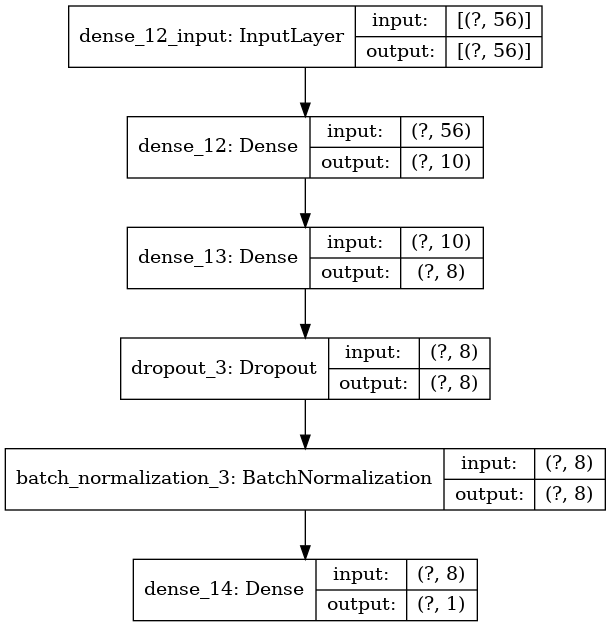

In [96]:
plot_model(model, 'model.png', show_shapes=True)

In [97]:
es = EarlyStopping(monitor='val_loss', patience=5) #To avoid overfitting or underfitting

In [98]:
# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0, callbacks=[es])

In [99]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)
print('Test Accuracy: %.3f' % loss)

Test Accuracy: 0.500
Test Accuracy: 0.719


In [100]:
# make a prediction
row = [101039, 99597, 39714, 530, 408, 56, 203, 3418, 59610, 97896, 78442, 3273, 84987, 1532, 4805, 286, 25117, 78, 47221, 72597, 76519, 0, 62675, 67143, 23299, 73948, 5325, 0, 3532, 1065, 0, 0, 0, 156, 0, 3455, 1325, 6532, 408, 2935, 52, 156, 26, 305, 0, 2675, 3639, 3532, 0, 2009, 2364, 1169, 2945, 390, 10, 179039]

yhat = model.predict([row])
print('Predicted: %.3f' % yhat)

Predicted: 0.610


In [101]:
import numpy as np
print('Predicted: %s (class=%d)' % (yhat, np.argmax(yhat)))

Predicted: [[0.6095802]] (class=0)


In [102]:
print("Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.")

Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.


In [103]:
#Save your model
model.save('model.h5')

In [104]:
#example of loading a saved model
from sklearn.datasets import make_classification
from tensorflow.keras.models import load_model
# create the dataset
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, random_state=1)
# load the model from file
model = load_model('model.h5')
# make a prediction
row = [101039, 99597, 39714, 530, 408, 56, 203, 3418, 59610, 97896, 78442, 3273, 84987, 1532, 4805, 286, 25117, 78, 47221, 72597, 76519, 0, 62675, 67143, 23299, 73948, 5325, 0, 3532, 1065, 0, 0, 0, 156, 0, 3455, 1325, 6532, 408, 2935, 52, 156, 26, 305, 0, 2675, 3639, 3532, 0, 2009, 2364, 1169, 2945, 390, 10, 179039]

yhat = model.predict([row])
#print('Predicted: %.3f' % yhat[0])
print('Predicted: %s (class=%d)' % (yhat, np.argmax(yhat)))

Predicted: [[0.6095802]] (class=0)


### Model worked for this data

### MLP for Multiclass Classification

In [105]:
# mlp for multiclass classification
from numpy import argmax
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
import pydot

In [106]:
# load the dataset
df = pd.read_csv('/home/srivastava/Documents/sklearn_work/NK_Cells.csv')
df = df.drop('Donor', axis='columns')
df.head()

,Status,NK Cells,CD16plus CD56int NK Cells,CD16plus CD56int CD69plus NK Cells,CD16plus CD56int NKp44plus NK Cells,CD16plus CD56int CXCR2hi NK Cells,CD16plus CD56int CD127plus NK Cells,CD16plus CD56int NKp46plus NK Cells,CD16plus CD56int CD107a NK Cells,CD16plus CD56int CD2plus NK Cells,...,CD16- CD56hi NKG2Cplus NK Cells,CD16- CD56hi CD94plus NK Cells,CD16- CD56hi CD25plus NK Cells,CD16- CD56hi CD226plus NK Cells,CD16- CD56hi CD57plus NK Cells,CD16- CD56hi CD57- NK Cells,CD16- CD56hi KLRG1plus NK Cells,CD16- CD56hi HLADRplus NK Cells,CD16- CD56hi ILRAplus NK Cells,NKT Population
0,ND,168029,164316,16669,164,1505,0,245,474,149757,...,752,1129,180,1031,33,1145,409,33,0,59870
1,ND,319110,309188,102196,53,28706,0,1220,2122,263608,...,3201,4882,460,3502,1539,3431,2069,778,0,32898
2,ND,76104,74531,9693,96,2696,0,0,128,50586,...,96,706,160,481,0,770,96,64,0,234859
3,ND,12498,12330,5360,24,769,0,0,0,8941,...,0,168,0,144,0,168,48,0,0,16248
4,ND,46378,45235,7148,0,50,0,25,163,25827,...,176,1030,38,892,0,1043,13,25,0,4258


In [107]:
# split into input and output columns
# ensure all data are floating point values
X = df.drop('Status', axis='columns')
y=df.Status
X = X.astype('float32')

In [108]:
# encode strings to integer
y = LabelEncoder().fit_transform(y)
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


In [109]:
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# determine the number of input features
n_features = X_train.shape[1]
print(n_features)

(36, 56) (4, 56) (36,) (4,)
56


In [110]:
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.5))#To avoid overfitting
model.add(BatchNormalization())#To accelerate training
model.add(Dense(3, activation='softmax'))

In [111]:
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', patience=5) #To avoid overfitting or underfitting
# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0, callbacks=[es])

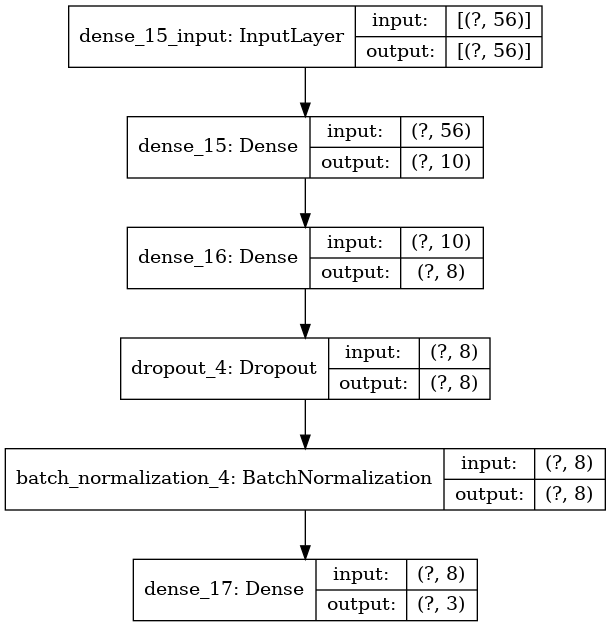

In [112]:
plot_model(model, 'model.png', show_shapes=True) #Plot your model

In [113]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.500


In [114]:
# make a prediction
row = [101039, 99597, 39714, 530, 408, 56, 203, 3418, 59610, 97896, 78442, 3273, 84987, 1532, 4805, 286, 25117, 78, 47221, 72597, 76519, 0, 62675, 67143, 23299, 73948, 5325, 0, 3532, 1065, 0, 0, 0, 156, 0, 3455, 1325, 6532, 408, 2935, 52, 156, 26, 305, 0, 2675, 3639, 3532, 0, 2009, 2364, 1169, 2945, 390, 10, 179039]
yhat = model.predict([row])
print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))

Predicted: [[0.60511374 0.3205598  0.07432642]] (class=0)


### This model did not work. Therefore for data like this use only binary

In [117]:
print ("echo "# tensorflow-example-with-cell-population-data" >> README.md
git init
git add README.md
git commit -m "first commit"
git branch -M main
git remote add origin https://github.com/kalsriv/tensorflow-example-with-cell-population-data.git
git push -u origin main")

SyntaxError: invalid syntax (<ipython-input-117-903db61da900>, line 2)